In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle
# import seaborn as sns
% matplotlib inline 

## Visualize data

In [2]:
def update_features(df):
    
    # remove date, add year/month/day
    df["year"] = [str(i)[0:4] for i in df["date_"]]
    df["month"] = [str(i)[4:6] for i in df["date_"]]
    df["day"] = [str(i)[6:8] for i in df["date_"]]
    df["year"] = df["year"].astype(int)
    df["month"] = df["month"].astype(int)
    df["day"] = df["day"].astype(int)
    df = df.drop("date_", axis=1)
    df = df.drop("on_promotion", axis=1)
    
#     print (len(list(df.columns.values)))
    for feature in ["store", "department", "item", "promotion_type", "month", "day"]:
        labels = df[feature]
        unique = list(set(labels))
        n_labels = len(unique)
#         print (feature + " " + str(n_labels))
        for i in range(n_labels):
            label = unique[i]
            new_feature_name = feature + str(i)
            df[new_feature_name] = (df[feature] == label).astype(int)
            
        df = df.drop(feature, axis=1)
        
    # take out outliers
    df = df.loc[df["unit_price"] < 55]
    df = df.loc[df["quantity"] < 1500]
    
    return df

In [ ]:
# def pairwise_plot(f, fig_path):
#     df = pd.read_csv(f)
    
#     # add year, month, day features
#     df = update_features(df)
# #     print (df)
#     sns_plot = sns.pairplot(df)
#     sns_plot.savefig(fig_path)
    
# save_path = './'

In [ ]:
# path = "data/hackathon_dataset_2011.dat"
# pairwise_plot(path, save_path + '2011.png')

In [ ]:
# path = "data/hackathon_dataset_2010.dat"
# pairwise_plot(path, save_path + '2010.png')

In [ ]:
# path = "data/hackathon_dataset_2009.dat"
# pairwise_plot(path, save_path + '2009.png')

In [ ]:
# df = pd.DataFrame()
# data_files=["data/hackathon_dataset_2011.dat", "data/hackathon_dataset_2010.dat", "data/hackathon_dataset_2009.dat"]

# for file_name in data_files:
#     df = df.append(pd.read_csv(file_name))

# df = update_features(df)

# sns_plot = sns.pairplot(df)
# sns_plot.savefig(save_path + 'total.png')
# print (df)

In [ ]:
# sns_plot = sns.pairplot(df, hue='department')

# Manual Pairwise Comparison

In [ ]:
# path = "data/hackathon_dataset_2011.dat"
# df = pd.read_csv(path)
# df = update_features(df)

# pairs = [("store", "department"), ("store", "item"), ("store", "unit_price"), ("store", "promotion_type"), ("store")]
# features= list(df.columns.values)
# n_features = len(features)
# for i in range(n_features):
#     for j in range(i+1, n_features):
#         plt.figure(figsize=(15, 15))
#         f1 = features[i]
#         f2 = features[j]
#         plt.plot(df[f1], df[f2], 'o')
#         plt.xlabel(f1)
#         plt.ylabel(f2)
#         plt.show()

In [ ]:
# features= list(df.columns.values)
# n_features = len(features)
# for i in range(n_features):
#     plt.figure(figsize=(15, 15))
#     f1 = "quantity"
#     f2 = features[i]
#     plt.plot(df[f1], df[f2], 'o')
#     plt.xlabel(f1)
#     plt.ylabel(f2)
#     plt.show()

# Split data into training, validation, and test sets

In [25]:
df = pd.DataFrame()
data_files=["data/hackathon_dataset_2011.dat", "data/hackathon_dataset_2010.dat", "data/hackathon_dataset_2009.dat"]

for file_name in data_files:
    df = df.append(pd.read_csv(file_name))

# print (len(df))
df = update_features(df)
# print (len(df))
# df = normalize_data(df)

n_points = len(df)
n_train = int(n_points*0.7)
n_validation = int(n_points*0.15)
n_test = int(n_points*0.15)
np.random.seed(0)
shuffled_idxs = np.arange(n_points)
np.random.shuffle(shuffled_idxs)

train = df.iloc[shuffled_idxs[:n_train+1]]
validation = df.iloc[shuffled_idxs[n_train+1:n_train+n_validation+1]]
test = df.iloc[shuffled_idxs[n_train+n_validation+1:]]

In [18]:
result_file = "data/hackathon_result.dat"
df = pd.read_csv(result_file)
print (len(df))
def update_results(df):
#     df["year"] = [str(i)[0:4] for i in df["date_"]]
    df["month"] = [str(i)[4:6] for i in df["date_"]]
    df["day"] = [str(i)[6:8] for i in df["date_"]]
#     df["year"] = df["year"].astype(int)
    df["month"] = df["month"].astype(int)
    df["day"] = df["day"].astype(int)
    df = df.drop("date_", axis=1)
    df = df.drop("on_promotion", axis=1)
    
    num_labels = [20, 4, 100, 7, 12, 31]
    feature_list = ["store", "department", "item", "promotion_type", "month", "day"]
    for i in range(len(feature_list)):
        feature = feature_list[i]
        labels = df[feature]
        unique = list(set(labels))
        if feature == "day":
            unique = [0] + unique
        n_labels = num_labels[i]
        print (feature + " " + str(n_labels))
        for i in range(n_labels):
            try:
                label = unique[i]
            except:
                label = float('inf')
            new_feature_name = feature + str(i)
            df[new_feature_name] = (df[feature] == label).astype(int)

        df = df.drop(feature, axis=1)
        
    # take out outliers
    df = df.drop("quantity", axis=1)
    
    return df

result = update_results(df)

33722
store 20
department 4
item 100
promotion_type 7
month 12
day 31


In [19]:
print (train.shape)
print (validation.shape)
print (test.shape)
print (result.shape)

(945215, 177)
(202545, 177)
(202546, 177)
(33722, 175)


In [22]:
with open('data/inputs.pkl', 'wb') as f:
    pickle.dump(result.as_matrix(), f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
def make_dataset_dict(train, validation, test):
    d = dict()
    
    d["train"] = dict()
    train = train.drop("year", axis=1)
    d["train"]["Y"] = train["quantity"].as_matrix()
    d["train"]["X"] = train.drop("quantity", axis=1).as_matrix()
    
    d["validation"] = dict()
    validation = validation.drop("year", axis=1)
    d["validation"]["Y"] = validation["quantity"].as_matrix()
    d["validation"]["X"] = validation.drop("quantity", axis=1).as_matrix()
    
    d["test"] = dict()
    test = test.drop("year", axis=1)
    d["test"]["Y"] = test["quantity"].as_matrix()
    d["test"]["X"] = test.drop("quantity", axis=1).as_matrix()
    
    return d

train2009 = train.loc[train['year'] == 2009]
train2010 = train.loc[train['year'] == 2010]
train2011 = train.loc[train['year'] == 2011]
validation2009 = validation.loc[validation['year'] == 2009]
validation2010 = validation.loc[validation['year'] == 2010]
validation2011 = validation.loc[validation['year'] == 2011]
test2009 = test.loc[test['year'] == 2009]
test2010 = test.loc[test['year'] == 2010]
test2011 = test.loc[test['year'] == 2011]

data_2009 = make_dataset_dict(train2009, validation2009, test2009)
data_2010 = make_dataset_dict(train2010, validation2010, test2010)
data_2011 = make_dataset_dict(train2011, validation2011, test2011)
all_data = make_dataset_dict(train, validation, test)

In [ ]:
with open('data/2009_datasets.pkl', 'wb') as f:
    pickle.dump(data_2009, f, protocol=pickle.HIGHEST_PROTOCOL)

with open('data/2010_datasets.pkl', 'wb') as f:
    pickle.dump(data_2010, f, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('data/2011_datasets.pkl', 'wb') as f:
    pickle.dump(data_2011, f, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('data/all_datasets.pkl', 'wb') as f:
    pickle.dump(all_data, f, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('data/2009_datasets.pkl', 'rb') as f:
#     t = pickle.load(f)
    
# print (t["train"]["Y"])
# result = result.drop("year", axis=1)
# with open('data/test.pkl', 'wb') as f:
#     pickle.dump(test.as_matrix(), f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# with open('data/2009_datasets.pkl', 'rb') as f:
#     t = pickle.load(f)
    
# print (t["train"]["X"].shape)

# with open('data/2010_datasets.pkl', 'rb') as f:
#     t = pickle.load(f)
    
# print (t["train"]["X"].shape)

# with open('data/2011_datasets.pkl', 'rb') as f:
#     t = pickle.load(f)
    
# print (t["train"]["X"].shape)

[ 2.   6.   6.  ... 24.   4.5  3. ]


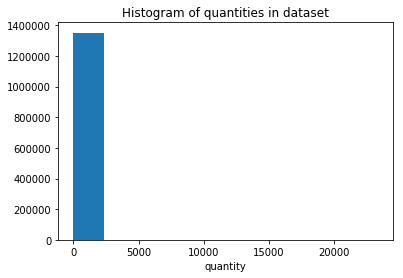

429


In [27]:
df = pd.DataFrame()
data_files=["data/hackathon_dataset_2011.dat", "data/hackathon_dataset_2010.dat", "data/hackathon_dataset_2009.dat"]

for file_name in data_files:
    df = df.append(pd.read_csv(file_name))
    
feature = "quantity"
l = np.asarray(df[feature])
print (l)
plt.hist(l)
plt.xlabel(feature)
plt.title('Histogram of quantities in dataset')
plt.show()
print (np.sum(l >= 1000))